# TP3

In [1]:
import seaborn as sns
import math, subprocess
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time
import networkx as nx
import os

## Funciones Auxiliares

In [2]:
def correr_experimento(p, archivo_instancia,algoritmo):
    # Leer archivo de la instancia.
    archivo_instancia_ubicado= "instancias/" + archivo_instancia+ ".txt"
    
    print(["TP3.exe",algoritmo,archivo_instancia_ubicado,str(p)])
    # Crear proceso para ejecutar el codigo.
    process = subprocess.Popen(["TP3.exe",algoritmo,archivo_instancia_ubicado,str(p)], stderr=subprocess.PIPE)

    # Correr experimento.
    exit_code = process.wait()
    
    # Verificar que el proceso no fallo.
    if exit_code != 0: raise Exception(F"Hubo un error")
    
    tiempo_de_ejecucion = float(process.stderr.read())
    #retornamos nombre del archivo de salida
    process.stderr.close();
    NombreSalida=  archivo_instancia_ubicado +".out"
    return NombreSalida, tiempo_de_ejecucion

def FileWriter5000(fileName, Graph):
    f = open(fileName, 'w')
    f.write(str(Graph.number_of_nodes()) + "\n")
    f.write(str(Graph.number_of_edges()) + "\n")
    lines = nx.generate_edgelist(Graph, data=False)
    for line in lines:
        f.write(line + "\n")
    f.close()
    
def leer_archivo_salida(archivo_res):
        #leer archivo de la salida.
        f = open(archivo_res, "r")
        salida= f.read().split()
        resultado= [float(x) for x in salida]
        return resultado
    
#devuelve el vector desvio estandar entre un array de arrays 
def promedio_desvio_estandar_vectores(vectores):
    return np.std(vectores,axis=0)
    
#devuelve el promedio del desvio estandar entre un array de arrays 
def promedio_desvio_estandar_vectores(vectores):
    return np.mean(np.std(vectores,axis=0)) 

def ecm(v1,v2):
    add=[]
    for i in range(len(v1)):
        add.append((v1[i]-v2[i])**2)
    return sum(add)/len(v1)

## Creacion de matrices (no hace falta llamar esto de nuevo)

In [3]:
# red sumidero de n nodos
def red_sumidero(n):
    G = nx.Graph()
    G.add_node(1)
    for i in range(2,n):
        G.add_node(i)
        G.add_edge(i,1)
    return G    

In [4]:
#creacion de redes sumidero de 0 a 100 nodos y edges
ns = [n*10 for n in range(10)]
grafos= [red_sumidero(n) for n in ns]
for grafo in grafos:
    FileWriter5000(f"instancias/red_sumidero_{grafo.number_of_edges()}.txt",grafo)

In [5]:
#creacion de redes random de 100 nodos y con posibilidad de edge entre 0.05 y 0.55
Grafos = []
ns= [x for x in range(1,11)]
for n in ns: 
    Grafos.append(nx.erdos_renyi_graph(100,0.1*n,directed=True))
for grafo in Grafos:
    grafo.remove_edges_from(nx.selfloop_edges(grafo))
    grafo.remove_nodes_from([0])
    FileWriter5000(f"instancias/grafo_random_{grafo.number_of_edges()}.txt",grafo)

## Mas funciones para correr el codigo

In [6]:
#llamar a esta funcion para correr el codigo con todas las redes sumidero, #corridas cantidad de veces
#devuelve lista de listas con los resultados, lista[0] son los resultados de la primer red
def correr_sumideros(corridas,algoritmo,p):
    files= []
    path= "instancias"
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and 'red_sumidero' in i and '.out' not in i:
            files.append(i)
    print(files)
    res= []
    for file in files:
        subRes= []
        for corrida in range(corridas):
            salida, tiempo= correr_experimento(p,file.removesuffix('.txt'),algoritmo)
            densidad= int(file.removesuffix('.txt').removeprefix("red_sumidero_"))
            subRes=([corrida,tiempo,algoritmo,densidad,leer_archivo_salida("instancias/"+file+".out"),p])
            res.append(subRes)
    columnas = ["corrida","tiempo","algoritmo","densidad","resultado","p"]
    df_resultado= pd.DataFrame(res, columns=columnas)
    df_resultado.to_csv(F"resultados/red_sumidero_{algoritmo}_{p}.csv", index=False, header=True)
    return df_resultado

#llamar a esta funcion para correr el codigo con todas las redes random, #corridas cantidad de veces
#devuelve lista de listas con los resultados, lista[0] son los resultados de la primer red
def correr_randoms(corridas,algoritmo,p):
    files= []
    path= "instancias"
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and 'grafo_random' in i and '.out' not in i:
            files.append(i)
    res= []
    for file in files:
        subRes= []
        for corrida in range(corridas):
            salida, tiempo= correr_experimento(p,file.removesuffix('.txt'),algoritmo)
            densidad= int(file.removesuffix('.txt').removeprefix("grafo_random_"))
            subRes=([corrida,tiempo,algoritmo,densidad,leer_archivo_salida("instancias/"+file+".out"),p])
            res.append(subRes)
        
    columnas = ["corrida","tiempo","algoritmo","densidad","resultado","p"]
    df_resultado= pd.DataFrame(res, columns=columnas)
    df_resultado.to_csv(F"resultados/red_random_{algoritmo}_{p}.csv", index=False, header=True)
    return res

In [7]:
#correr_experimento(0.51,"red_sumidero_8","EG")
iter = 10
correr_sumideros(iter, "GS", 0.5)
correr_randoms(iter, "GS", 0.5)
correr_sumideros(iter, "JA", 0.5)
correr_randoms(iter, "JA", 0.5)
correr_sumideros(iter, "EG", 0.5)
correr_randoms(iter, "EG", 0.5)

['red_sumidero_28.txt', 'red_sumidero_8.txt', 'red_sumidero_88.txt', 'red_sumidero_38.txt', 'red_sumidero_68.txt', 'red_sumidero_0.txt', 'red_sumidero_78.txt', 'red_sumidero_58.txt', 'red_sumidero_48.txt', 'red_sumidero_18.txt']


AttributeError: 'str' object has no attribute 'removesuffix'

In [ ]:
def correr_instancias_catedra(corridas,p):
    files= ["test_completo","test_15_segundos","test_30_segundos"]
    algoritmos=["EG","JA","GS"]
    res= []
    for algoritmo in algoritmos:
        for file in files:
            for corrida in range(corridas):
                correr_experimento(p,file,algoritmo)
                subRes= leer_archivo_salida("instancias/"+file+".txt.out")
                res.append([corrida,file,algoritmo,subRes,p])
                
    columnas = ["corrida","instancia","algoritmo","resultado","p"]
    df_resultado= pd.DataFrame(res, columns=columnas);
    df_resultado.to_csv(F"resultados/catedra_{p}.csv", index=False, header=True);    
    return res              
correr_instancias_catedra(1,0.9)


In [ ]:
catedra = pd.read_csv('resultados/catedra_0.9.csv')
df_errores_columnas= ["instancia", "algoritmo", "error"]
instancias= ["test_15_segundos","test_30_segundos"]
algoritmos=["EG","JA","GS"]
res=[]
for instancia in instancias:
    for algoritmo in algoritmos:
        subRes=catedra[(catedra["instancia"]==instancia) & (catedra["algoritmo"]==algoritmo)]
        res.append([instancia,algoritmo,ecm(eval(subRes["resultado"].tolist()[0])[1:],leer_archivo_salida(f"resultados/{instancia}.txt.out")[1:])]) 
df_resultado= pd.DataFrame(res,columns= df_errores_columnas)

In [ ]:
#df_15= df_resultado[df_resultado["instancia"]=="test_15_segundos"]
#sns.barplot(data=df_15, x="algoritmo", y="error")
df_30= df_resultado[df_resultado["instancia"]=="test_30_segundos"]
sns.barplot(data=df_30, x="algoritmo", y="error")

# Analisis y graficos

In [28]:
df_sum_EG = pd.read_csv('resultados/red_sumidero_EG_0.5.csv')
print(np.std(df_sum_EG['tiempo']))
df_sum_JA = pd.read_csv('resultados/red_sumidero_JA_0.5.csv')
print(np.std(df_sum_JA['tiempo']))
df_sum_GS = pd.read_csv('resultados/red_sumidero_GS_0.5.csv')
print(np.std(df_sum_EG['tiempo']))

df_rand_EG = pd.read_csv('resultados/red_random_EG_0.5.csv')
print(np.std(df_rand_EG['tiempo']))
df_rand_JA = pd.read_csv('resultados/red_random_JA_0.5.csv')
print(np.std(df_rand_JA['tiempo']))
df_rand_GS = pd.read_csv('resultados/red_random_GS_0.5.csv')
print(np.std(df_rand_GS['tiempo']))

1.1118653477935176
0.8437981024931261
1.1118653477935176
0.9941172309219876
1.845251409616316
2.577798145603336


<AxesSubplot: xlabel='Densidad', ylabel='Tiempo (ms)'>

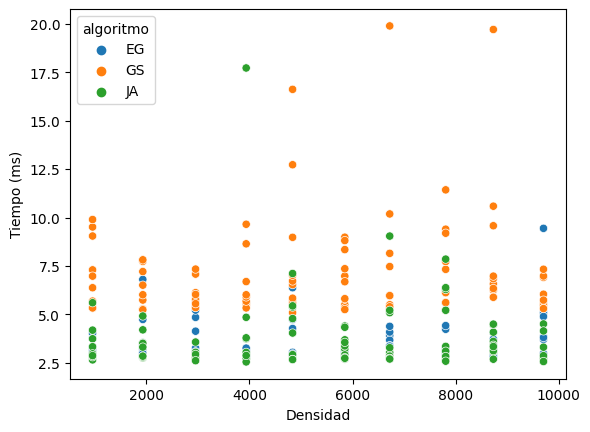

In [19]:
df = pd.concat([df_rand_EG, df_rand_GS, df_rand_JA])
df['Densidad'] = df['densidad']
df['Tiempo (ms)'] = df['tiempo']

sns.scatterplot(data=df, x='Densidad', y='Tiempo (ms)', hue='algoritmo')

In [14]:
def promedios(df, densidades):
  promedios = []
  for densidad in densidades:
    df_densidad = df.loc[df['densidad'] == densidad]
    promedio = df_densidad['tiempo'].mean(0)
    promedios.append((promedio, densidad))
  return pd.DataFrame(promedios, columns=['promedio', 'densidad'])

In [23]:
densidades_sumidero = [8, 18, 28, 38, 48, 58, 68, 78, 88] 
densidades_random = [960, 1934, 2957, 3938, 4838, 5850, 6721, 7806, 8730, 9702]

prom_sum_EG = promedios(df_sum_EG, densidades_sumidero)
prom_sum_EG['algoritmo'] = 'EG'
prom_sum_JA = promedios(df_sum_JA, densidades_sumidero)
prom_sum_JA['algoritmo'] = 'JA'
prom_sum_GS = promedios(df_sum_GS, densidades_sumidero)
prom_sum_GS['algoritmo'] = 'GS'
prom_sum = pd.concat([prom_sum_EG, prom_sum_GS, prom_sum_JA])
prom_sum['Cantidad de páginas'] = prom_sum['densidad']
prom_sum['Tiempo promedio (ms)'] = prom_sum['promedio']

prom_rand_EG = promedios(df_rand_EG, densidades_random)
prom_rand_EG['algoritmo'] = 'EG'
prom_rand_JA = promedios(df_rand_JA, densidades_random)
prom_rand_JA['algoritmo'] = 'JA'
prom_rand_GS = promedios(df_rand_GS, densidades_random)
prom_rand_GS['algoritmo'] = 'GS'
prom_rand = pd.concat([prom_rand_EG, prom_rand_GS, prom_rand_JA])
prom_rand['Densidad'] = prom_rand['densidad']
prom_rand['Tiempo promedio (ms)'] = prom_rand['promedio']

<AxesSubplot: xlabel='Cantidad de páginas', ylabel='Tiempo promedio (ms)'>

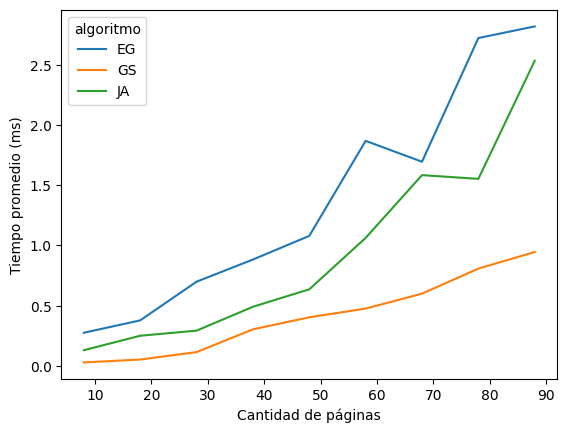

In [17]:
sns.lineplot(data=prom_sum, x='Cantidad de páginas', y='Tiempo promedio (ms)', hue='algoritmo')

<AxesSubplot: xlabel='Densidad', ylabel='Tiempo promedio (ms)'>

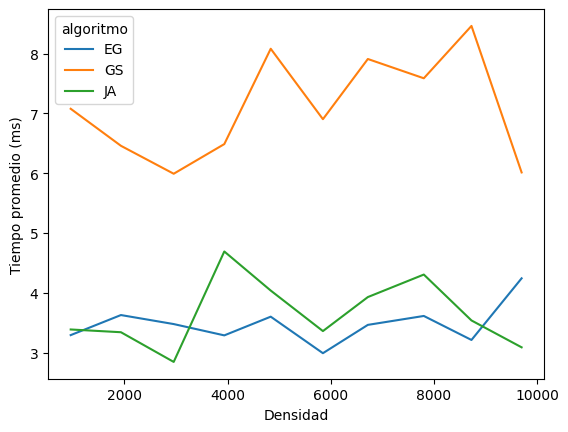

In [18]:
sns.lineplot(data=prom_rand, x='Densidad', y='Tiempo promedio (ms)', hue='algoritmo')

In [27]:
df_sum_dens_EG = pd.read_csv('resultados/red_sumidero_nodos_fijosEG_0.5.csv')
print(np.std(df_sum_dens_EG['tiempo']))
df_sum_dens_GS = pd.read_csv('resultados/red_sumidero_nodos_fijosGS_0.5.csv')
print(np.std(df_sum_dens_GS['tiempo']))
df_sum_dens_JA = pd.read_csv('resultados/red_sumidero_nodos_fijosJA_0.5.csv')
print(np.std(df_sum_dens_JA['tiempo']))

1.642359099686789
0.5310963807926015
2.7789447660822626


<AxesSubplot: xlabel='Densidad', ylabel='Tiempo (ms)'>

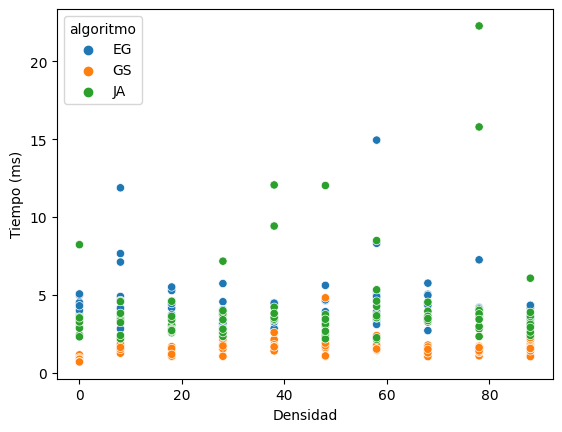

In [22]:
df = pd.concat([df_sum_dens_EG, df_sum_dens_GS, df_sum_dens_JA])

df['Densidad'] = df['densidad']
df['Tiempo (ms)'] = df['tiempo']

sns.scatterplot(data=df, x='Densidad', y='Tiempo (ms)', hue='algoritmo')

<AxesSubplot: xlabel='Densidad', ylabel='Tiempo promedio (ms)'>

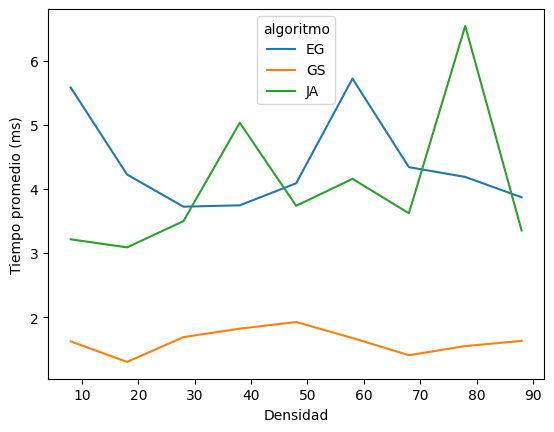

In [25]:
prom_sum_dens_EG = promedios(df_sum_dens_EG, densidades_sumidero)
prom_sum_dens_EG['algoritmo'] = 'EG'
prom_sum_dens_GS = promedios(df_sum_dens_GS, densidades_sumidero)
prom_sum_dens_GS['algoritmo'] = 'GS'
prom_sum_dens_JA = promedios(df_sum_dens_JA, densidades_sumidero)
prom_sum_dens_JA['algoritmo'] = 'JA'

prom_sum_dens = pd.concat([prom_sum_dens_EG, prom_sum_dens_GS, prom_sum_dens_JA])
prom_sum_dens['Densidad'] = prom_sum_dens['densidad']
prom_sum_dens['Tiempo promedio (ms)'] = prom_sum_dens['promedio']

sns.lineplot(data=prom_sum_dens, x='Densidad', y='Tiempo promedio (ms)', hue='algoritmo')